# Exercise 1

In [3]:
#importing libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df=pd.read_csv("mtcars.csv");
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.shape

(32, 12)

### 1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [6]:
def myFnLinReg(X,Y):
    
    # mean of inputs and outputs
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    
    #total number of values
    n = len(X)
    
    # using the formula to calculate theta1 and theta0
    numerator = 0
    denominator = 0
    for i in range(n):
        numerator += (X[i] - x_mean) * (Y[i] - y_mean)
        denominator += (X[i] - x_mean) ** 2
    
    theta1 = numerator / denominator
    theta0 = y_mean - (theta1 * x_mean)
   
    return theta1, theta0
    #y=theta1x+theta0
        



### 2. Use mtcars data set and consider the attributes mpg andweight. Split data into train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [7]:
x=df[["wt"]]
y=df[["mpg"]]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)#70 30 split

In [9]:
theta1,theta0= myFnLinReg(x_train.values,y_train.values)
theta1,theta0

(array([-5.35614652]), array([37.04389561]))

### 3. What is the mpg of a car, whose weight is 6.7?

In [10]:
print("mpg of a car, whose weight is 6.7 =",(theta1*6.7+theta0))

mpg of a car, whose weight is 6.7 = [1.15771395]



### 4.Compute and print accuracy measures such as RMSE and R2 for the test set. 

In [11]:
predictions=[]

for i in range(len(x_test)):
    pred=(x_test.values[i]*theta1)+theta0
    predictions.append(pred)
    
predictions  

[array([22.20736976]),
 array([7.9921569]),
 array([16.44951225]),
 array([25.26037327]),
 array([20.17203408]),
 array([18.61875159]),
 array([17.92245255]),
 array([26.6797521]),
 array([17.0654691]),
 array([23.01079174])]

In [12]:
y_test

,mpg
29,19.7
15,10.4
24,19.2
17,32.4
8,22.8
9,19.2
30,15.0
25,27.3
12,17.3
0,21.0


#### Calculating Root Mean Square Error

In [13]:
numerator=0
denominator=0
for i in range(len(predictions)):

    numerator+=((predictions[i]-y_test.values[i])**2)
    denominator+=((predictions[i]-np.mean(y_test))**2)
    
    
rmse=np.sqrt(numerator/len(predictions))
rmse

c:\Users\91704\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([3.01482741])

#### Calculating R2

In [14]:
r2=1-(numerator/denominator)
r2

mpg    0.655335
dtype: float64

65% of the model fits the data

### 5.Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function

 ### Stochastic Gradient Descent
 

In [16]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
      
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x_train.values,y_train.values.reshape(y_train.shape[0],),15000)
w_sgd, b_sgd, cost_sgd

(array([-5.58902159]), 36.82195183989123, 0.014472345535354258)

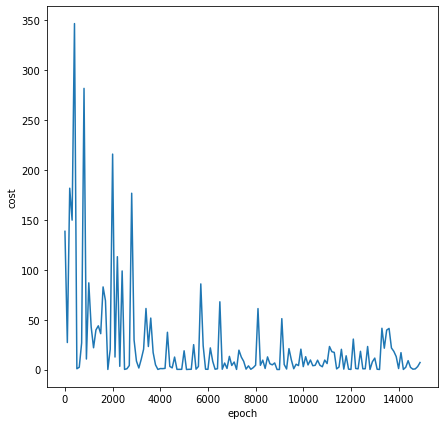

In [17]:
plt.figure(figsize=(7,7))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

### MiniBatch Gradient Descent

In [18]:
import random
def mb_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
 
    number_of_features = X.shape[1]
   
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        indices = np.random.randint(0,total_samples-1,10) #10 random indices for minibatch from total samples
        sample_x = X[indices]
        sample_y = y_true[indices]
        
    
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        
        b = b - learning_rate * b_grad
        b=b.mean()
        
        cost = np.square(sample_y-y_predicted)
        cost=cost.mean()
       
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = mb_gradient_descent(x_train.values,y_train.values.reshape(y_train.shape[0],),15000)
w_sgd, b_sgd, cost_sgd

(array([-5.43199824]), 36.886667834839216, 7.347895053375505)

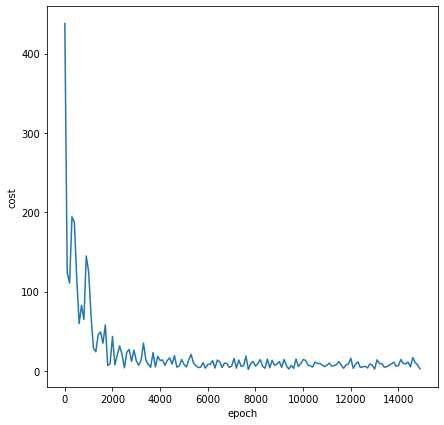

In [19]:
plt.figure(figsize=(7,7))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()